In [1]:
from Códigos import *

sns.set_style('whitegrid')

In [2]:
df_soja = pd.read_csv('produtividade_soja_modelagem.csv')

In [3]:
df_soja.head()

,nivel,codigo_ibge,name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MU,4100103,Abatiá,2600.0,1750.0,2100.0,2600.0,2600.0,2080.0,2590.0,3350.0,2320.0,3100.0,1460.0,2640.0,2760.0,3480.0
1,MU,4100459,Altamira do Paraná,3100.0,2460.0,2950.0,2950.0,2749.0,2749.0,3250.0,3200.0,2197.0,3223.0,3471.0,3099.0,2871.0,3818.0
2,MU,4100608,Alto Paraná,1487.0,1365.0,1734.0,2727.0,2400.0,1620.0,2899.0,2899.0,1737.0,2880.0,2000.0,1800.0,2221.0,2980.0
3,MU,4100707,Alto Piquiri,2300.0,2300.0,2700.0,3193.0,2701.0,2097.0,3130.0,3310.0,2000.0,3000.0,3192.0,3488.0,2589.0,3700.0
4,MU,4100509,Altônia,1050.0,1800.0,1255.0,2355.0,2600.0,1300.0,3000.0,2773.0,815.0,2137.0,1800.0,2455.0,2780.0,2900.0


In [4]:
df = pd.read_csv('agroclimatology_budokai.csv')
df = df.drop(df.iloc[:127385,:].index).reset_index().drop(columns=['index'])

df['data'] = df['data'].apply(lambda x: str(x))
df['data'] = df['data'].apply(lambda x: x[0] + x[1] + x[2] + x[3] + "-" + x[4] + x[5] + "-" + x[6] + x[7])
df['data'] = pd.to_datetime(df['data'])

In [5]:
df.head()

,data,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
0,2004-01-01,4100103,-23.3049,-50.3133,9.31,22.72,19.36,20.92,26.80,17.48,...,0.64,0.64,12.65,30.54,42.73,73.09,164.70,10.66,0.33,1.68
1,2004-01-02,4100103,-23.3049,-50.3133,14.81,22.44,16.05,18.85,29.31,14.51,...,0.63,0.64,25.99,31.40,42.71,138.50,164.70,18.52,0.55,2.82
2,2004-01-03,4100103,-23.3049,-50.3133,14.98,22.31,14.65,18.09,29.30,14.33,...,0.62,0.63,27.65,31.69,42.69,143.21,162.20,18.97,0.58,3.02
3,2004-01-04,4100103,-23.3049,-50.3133,15.10,23.35,16.26,19.41,30.32,15.22,...,0.61,0.62,25.83,30.96,42.66,137.53,162.50,18.33,0.55,2.88
4,2004-01-05,4100103,-23.3049,-50.3133,16.62,25.19,17.12,20.68,32.98,16.37,...,0.60,0.62,26.08,31.15,42.63,139.22,163.85,18.62,0.57,2.98


In [6]:
arq = open('Cidades.txt', 'r')
cidades = [int(cidade.rstrip()) for cidade in arq]

In [7]:
new_df = creation_train(cidades, df, treino=True)
df_test = creation_train(cidades, df, treino=False)

C:\Users\Dayvison\Desktop\HACKTHON\Desafio\Códigos.py:38: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  n_df.loc[len(n_df)] = [ano, dados['codigo_ibge'][0]] + df_2.mean().tolist()[1:]
C:\Users\Dayvison\Desktop\HACKTHON\Desafio\Códigos.py:52: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  n_df.loc[len(n_df)] = [ano, dados['codigo_ibge'][i+1]] + df_2.mean().tolist()[1:]


In [8]:
new_df[:15]

,data,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
1,2004.0,4100103.0,-23.3049,-50.3133,11.718115,20.478634,15.675109,18.054235,26.803716,15.084891,...,0.653470,0.669344,18.217459,23.388852,33.222732,95.921639,121.738852,12.615137,0.349153,-14.602541
2,2005.0,4100103.0,-23.3049,-50.3133,12.236411,21.286301,15.906192,18.541260,27.863233,15.627096,...,0.625918,0.639178,17.932959,23.132685,33.191616,94.901562,120.795699,12.459096,0.341260,-11.944986
3,2006.0,4100103.0,-23.3049,-50.3133,12.665671,21.475699,15.217507,18.280877,28.304219,15.638247,...,0.602877,0.615096,18.420027,23.498658,33.189068,97.278192,122.684986,12.798301,0.358603,-11.850767
4,2007.0,4100103.0,-23.3049,-50.3133,11.937288,21.069288,16.074000,18.582712,27.591616,15.654466,...,0.657753,0.674082,18.443781,23.201205,33.187096,97.258493,121.057973,12.712027,0.350164,-17.385123
5,2008.0,4100103.0,-23.3049,-50.3133,12.109836,20.708087,15.581284,18.103552,27.208962,15.099044,...,0.633907,0.649481,18.063142,23.497404,33.212404,95.715355,122.975437,12.634590,0.353552,-17.296721
6,2009.0,4100103.0,-23.3049,-50.3133,10.546877,20.799534,17.021041,18.920575,26.593918,16.047479,...,0.714521,0.730932,17.060767,23.238521,33.186603,91.192329,122.393397,12.101781,0.336822,-14.710959
7,2010.0,4100103.0,-23.3049,-50.3133,11.059945,20.250822,16.218548,18.248000,26.365534,15.305534,...,0.756877,0.782466,17.791479,23.112055,33.192493,94.059452,120.804795,12.341507,0.340767,-9.208247
8,2011.0,4100103.0,-23.3049,-50.3133,12.070274,20.808603,15.530658,18.096164,27.296685,15.226384,...,0.632493,0.648247,18.293096,23.464438,33.199233,96.949342,123.122110,12.790329,0.345890,-22.903151
9,2012.0,4100103.0,-23.3049,-50.3133,12.520738,21.979672,15.756175,18.751202,28.604918,16.083798,...,0.605164,0.616831,18.542077,23.488989,33.230328,98.394098,123.332240,12.972158,0.354973,-11.832404
10,2013.0,4100103.0,-23.3049,-50.3133,11.271836,20.331671,16.177507,18.249288,26.410384,15.138329,...,0.690904,0.709918,17.726384,23.517726,33.202411,94.243753,123.532164,12.497151,0.350384,-17.380712


In [9]:
df_test

,data,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
1,2018.0,4100103.0,-23.3049,-50.3133,11.069370,21.014603,16.634849,18.836603,27.053945,15.984795,...,0.684822,0.706000,18.024685,23.369644,33.189808,95.836027,122.928219,12.645479,0.345342,-22.891973
2,2019.0,4100103.0,-23.3049,-50.3133,12.376658,22.478274,16.516137,19.405507,29.103616,16.726767,...,0.609507,0.622110,18.506740,23.232301,33.190247,98.230137,122.042055,12.897616,0.356904,-17.342466
3,2020.0,4100103.0,-23.3049,-50.3133,13.699590,22.334372,15.040656,18.563361,29.570109,15.870929,...,0.581503,0.593716,19.041557,23.353388,33.219672,100.380601,121.863689,13.061639,0.370546,-30.884781
4,2018.0,4100459.0,-24.7983,-52.7128,9.383397,19.793068,16.606164,18.279945,24.968356,15.584822,...,0.734849,0.775863,17.574986,23.276192,32.959616,93.233397,122.219973,12.309370,0.333918,-20.205452
5,2019.0,4100459.0,-24.7983,-52.7128,10.172027,20.920767,16.625315,18.832247,26.533644,16.361507,...,0.699014,0.736329,17.775863,23.078493,32.959534,94.221699,121.025808,12.381562,0.339562,-28.395945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2019.0,4128708.0,-26.2683,-52.7843,12.522027,24.733068,17.162219,20.678466,31.012630,18.490658,...,0.586959,0.590000,19.170575,23.377589,33.411452,102.465315,123.644274,13.441288,0.373507,-41.923370
1044,2020.0,4128708.0,-26.2683,-52.7843,13.745710,24.597923,15.670628,19.837678,31.409098,17.663798,...,0.597596,0.602268,19.707842,23.416940,33.440191,104.648142,123.017077,13.588552,0.386940,-41.721393
1045,2018.0,4128500.0,-23.8742,-49.8032,11.400932,23.121068,17.424110,20.115288,28.972685,17.571123,...,0.678712,0.685014,18.620658,23.383205,33.411534,99.766384,123.836959,13.144712,0.359836,-31.038219
1046,2019.0,4128500.0,-23.8742,-49.8032,12.522027,24.733068,17.162219,20.678466,31.012630,18.490658,...,0.586959,0.590000,19.170575,23.377589,33.411452,102.465315,123.644274,13.441288,0.373507,-41.923370


In [10]:
df_2 = comprensao(new_df)

In [11]:
df_2

,data,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
1,2017.0,4100103.0,-23.3049,-50.3133,11.545224,20.906429,16.160971,18.511378,27.170974,15.625644,...,0.671008,0.688048,17.998686,23.328904,33.202763,95.398499,122.217544,12.568031,0.347666,-16.400436
2,2017.0,4100459.0,-24.7983,-52.7128,10.263206,20.067515,15.737221,17.960233,25.699775,15.436669,...,0.708367,0.745146,17.818350,23.236018,32.972655,94.103501,121.431078,12.380719,0.340091,-25.831564
3,2017.0,4100608.0,-23.1312,-52.3189,11.919401,22.405375,17.134748,19.749328,29.020205,17.100900,...,0.636229,0.649546,18.127336,23.224264,33.202759,96.363616,122.152130,12.611867,0.347558,-36.358458
4,2017.0,4100707.0,-24.0224,-53.4400,11.598510,22.782761,17.461132,20.011790,28.861733,17.263148,...,0.694920,0.698400,17.829189,23.147419,32.972641,94.412478,121.311107,12.372003,0.339252,-41.292972
5,2017.0,4100509.0,-23.8759,-53.8958,11.598510,22.782761,17.461132,20.011790,28.861733,17.263148,...,0.694920,0.698400,18.167839,23.207707,33.202791,96.629152,122.146011,12.623435,0.348161,-35.178781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2017.0,4128559.0,-25.0577,-53.8771,11.941463,23.083122,16.917039,19.809115,29.160529,17.219154,...,0.661987,0.666967,18.624347,23.325730,33.424021,99.421271,123.034976,13.049481,0.360816,-46.071314
346,2017.0,4128609.0,-25.8772,-52.9051,11.941463,23.083122,16.917039,19.809115,29.160529,17.219154,...,0.661987,0.666967,18.624347,23.325730,33.424021,99.421271,123.034976,13.049481,0.360816,-46.071314
347,2017.0,4128658.0,-25.3829,-52.1987,11.941463,23.083122,16.917039,19.809115,29.160529,17.219154,...,0.661987,0.666967,18.624347,23.325730,33.424021,99.421271,123.034976,13.049481,0.360816,-46.071314
348,2017.0,4128708.0,-26.2683,-52.7843,11.941463,23.083122,16.917039,19.809115,29.160529,17.219154,...,0.661987,0.666967,18.624347,23.325730,33.424021,99.421271,123.034976,13.049481,0.360816,-46.071314


In [12]:
new_df['Production'] = valores(df_soja, cidades)

In [13]:
df_ = cada_cidade_uma_linha(new_df)

In [14]:
df_

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,codigo_ibge
data,,,,,,,,,,,,,,,
2017.0,3480.0,2760.0,2640.0,1460.0,3100.0,2320.0,3350.0,2590.0,2080.0,2600.0,2600.0,2100.0,1750.0,2600.0,4100103.0
2017.0,3818.0,2871.0,3099.0,3471.0,3223.0,2197.0,3200.0,3250.0,2749.0,2749.0,2950.0,2950.0,2460.0,3100.0,4100459.0
2017.0,2980.0,2221.0,1800.0,2000.0,2880.0,1737.0,2899.0,2899.0,1620.0,2400.0,2727.0,1734.0,1365.0,1487.0,4100608.0
2017.0,3700.0,2589.0,3488.0,3192.0,3000.0,2000.0,3310.0,3130.0,2097.0,2701.0,3193.0,2700.0,2300.0,2300.0,4100707.0
2017.0,2900.0,2780.0,2455.0,1800.0,2137.0,815.0,2773.0,3000.0,1300.0,2600.0,2355.0,1255.0,1800.0,1050.0,4100509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017.0,3750.0,3500.0,3394.0,3216.0,3743.0,1611.0,3498.0,3385.0,1999.0,3470.0,3000.0,2229.0,2628.0,2300.0,4128559.0
2017.0,3720.0,2690.0,3111.0,2582.0,2714.0,1941.0,3166.0,2625.0,1892.0,2278.0,2248.0,2167.0,1540.0,2375.0,4128609.0
2017.0,3600.0,1360.0,3049.0,3048.0,2748.0,2236.0,3350.0,3200.0,2500.0,3113.0,3075.0,3100.0,1900.0,2400.0,4128658.0


In [15]:
df_time_series = pd.concat([df_, df_2.set_index('data').drop(columns=['codigo_ibge'])],axis=1)

In [16]:
df_time_series

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
data,,,,,,,,,,,,,,,,,,,,,
2017.0,3480.0,2760.0,2640.0,1460.0,3100.0,2320.0,3350.0,2590.0,2080.0,2600.0,...,0.671008,0.688048,17.998686,23.328904,33.202763,95.398499,122.217544,12.568031,0.347666,-16.400436
2017.0,3818.0,2871.0,3099.0,3471.0,3223.0,2197.0,3200.0,3250.0,2749.0,2749.0,...,0.708367,0.745146,17.818350,23.236018,32.972655,94.103501,121.431078,12.380719,0.340091,-25.831564
2017.0,2980.0,2221.0,1800.0,2000.0,2880.0,1737.0,2899.0,2899.0,1620.0,2400.0,...,0.636229,0.649546,18.127336,23.224264,33.202759,96.363616,122.152130,12.611867,0.347558,-36.358458
2017.0,3700.0,2589.0,3488.0,3192.0,3000.0,2000.0,3310.0,3130.0,2097.0,2701.0,...,0.694920,0.698400,17.829189,23.147419,32.972641,94.412478,121.311107,12.372003,0.339252,-41.292972
2017.0,2900.0,2780.0,2455.0,1800.0,2137.0,815.0,2773.0,3000.0,1300.0,2600.0,...,0.694920,0.698400,18.167839,23.207707,33.202791,96.629152,122.146011,12.623435,0.348161,-35.178781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017.0,3750.0,3500.0,3394.0,3216.0,3743.0,1611.0,3498.0,3385.0,1999.0,3470.0,...,0.661987,0.666967,18.624347,23.325730,33.424021,99.421271,123.034976,13.049481,0.360816,-46.071314
2017.0,3720.0,2690.0,3111.0,2582.0,2714.0,1941.0,3166.0,2625.0,1892.0,2278.0,...,0.661987,0.666967,18.624347,23.325730,33.424021,99.421271,123.034976,13.049481,0.360816,-46.071314
2017.0,3600.0,1360.0,3049.0,3048.0,2748.0,2236.0,3350.0,3200.0,2500.0,3113.0,...,0.661987,0.666967,18.624347,23.325730,33.424021,99.421271,123.034976,13.049481,0.360816,-46.071314


In [17]:
df_time_series_20_cidades, df_time_series_2 = separacao(df_time_series.reset_index(), cidades)

In [18]:
df_time_series_20_cidades = df_time_series_20_cidades.set_index('data')

In [19]:
df_time_series_20_cidades = df_time_series_20_cidades[['PRECTOTCORR','GWETTOP','GWETROOT','GWETPROF','RH2M',
                                                       't','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','t-9','t-10',
                                                       't-11','t-12','t-13']]

In [20]:
df_time_series_2 = df_time_series_2.set_index('data')

In [21]:
df_time_series_2 = df_time_series_2[['PRECTOTCORR','GWETTOP','GWETROOT','GWETPROF','RH2M',
                                                       't','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','t-9','t-10',
                                                       't-11','t-12','t-13']]

In [22]:
X_train = df_time_series_2.drop(columns=['t']).values
y_train = df_time_series_2['t'].values

X_test = df_time_series_20_cidades.drop(columns=['t']).values
y_test = df_time_series_20_cidades['t'].values

In [23]:
X_test.shape

(20, 18)

In [24]:
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 25, n_estimators = 50, random_state=10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [25]:
mean_absolute_error(y_test, preds)

264.49029541015625

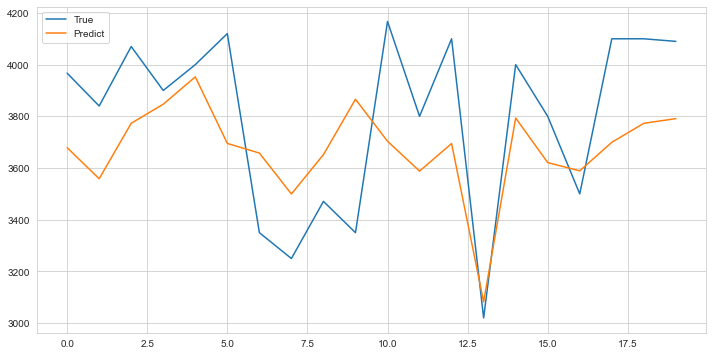

In [26]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(preds, label='Predict')
plt.legend()
plt.show()

202.90735714285714


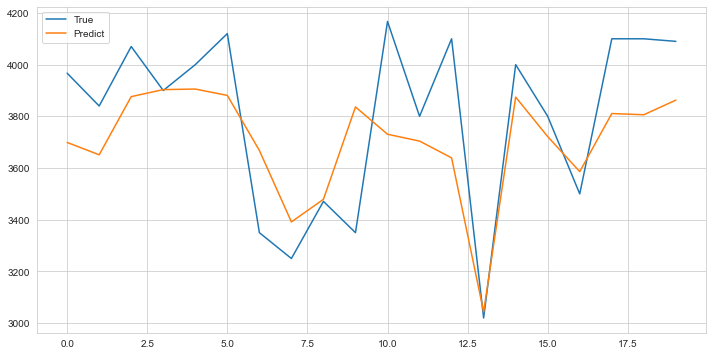

In [27]:
regr = RandomForestRegressor(max_depth=20, random_state=10)

regr.fit(X_train, y_train)

preds = regr.predict(X_test)

print(mean_absolute_error(y_test, preds))

plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(preds, label='Predict')
plt.legend()
plt.show()

In [73]:
X_train_ = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_ = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
model = keras.models.Sequential([
    keras.layers.LSTM(100, kernel_initializer='normal', return_sequences=True, input_shape=(18,1), activation='relu'),
    keras.layers.LSTM(100, kernel_initializer='normal', return_sequences=True, activation='relu'),
    keras.layers.LSTM(100, kernel_initializer='normal', return_sequences=True, activation='relu'),
    keras.layers.LSTM(100, activation='relu'),
    keras.layers.Dense(1, activation='linear')

])
callback = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=4, verbose=1, mode="auto") 

model.compile(loss='mae', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

In [38]:
fit = model.fit(X_train_, y_train, epochs=20, batch_size=14, validation_data=(X_test_, y_test), callbacks=[callback])

Epoch 1/20
24/24 [==============================] - 3s 30ms/step - loss: 1805.6873 - mae: 1805.6873 - val_loss: 2111.4546 - val_mae: 2111.4546
Epoch 2/20
24/24 [==============================] - 0s 16ms/step - loss: 1466.4553 - mae: 1466.4553 - val_loss: 1883.9115 - val_mae: 1883.9115
Epoch 3/20
24/24 [==============================] - 0s 16ms/step - loss: 649.3263 - mae: 649.3263 - val_loss: 189.2954 - val_mae: 189.2954
Epoch 4/20
24/24 [==============================] - 0s 15ms/step - loss: 345.1319 - mae: 345.1319 - val_loss: 189.1737 - val_mae: 189.1737
Epoch 5/20
24/24 [==============================] - 0s 16ms/step - loss: 310.7661 - mae: 310.7661 - val_loss: 215.5008 - val_mae: 215.5008
Epoch 6/20
24/24 [==============================] - 0s 15ms/step - loss: 322.5074 - mae: 322.5074 - val_loss: 210.0821 - val_mae: 210.0821
Epoch 7/20
24/24 [==============================] - 0s 16ms/step - loss: 314.4742 - mae: 314.4742 - val_loss: 193.2403 - val_mae: 193.2403
Epoch 8/20
24/24 [=

In [39]:
y_pred = model.predict(X_test)

376.6379028320313


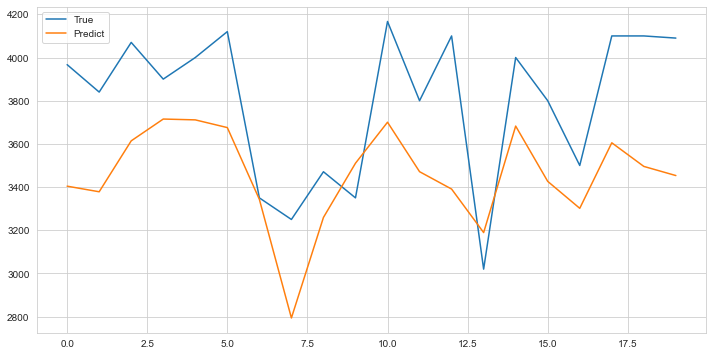

In [40]:
print(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predict')
plt.legend()
plt.show()

In [28]:
df_test = df_test[['data','codigo_ibge','PRECTOTCORR','GWETTOP','GWETROOT','GWETPROF','RH2M']]

In [29]:
df_test_2018 = df_test[df_test['data'] == 2018]

In [30]:
df_test_2018_20_cidades, _ = separacao(df_test_2018, cidades)

In [31]:
df_test_2018_20_cidades = df_test_2018_20_cidades.set_index('data')

In [32]:
df_test_2018_20_cidades = pd.concat([df_test_2018_20_cidades.reset_index()
           
           , df_time_series_20_cidades.reset_index()[['t','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','t-9','t-10','t-11','t-12','t-13']]],axis=1)

In [33]:
df_test_2018_20_cidades

,data,codigo_ibge,PRECTOTCORR,GWETTOP,GWETROOT,GWETPROF,RH2M,t,t-1,t-2,...,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13
0,2018.0,4102000.0,3.664822,0.760740,0.753041,0.743507,78.406192,3967.0,3420.0,3295.0,...,3493.0,1401.0,3291.0,3671.0,997.0,3100.0,2968.0,2064.0,2600.0,2199.0
1,2018.0,4104303.0,3.979123,0.741726,0.723288,0.728192,80.068055,3840.0,3048.0,3574.0,...,3293.0,2496.0,3400.0,2982.0,2407.0,2984.0,3099.0,2677.0,2280.0,2733.0
2,2018.0,4104428.0,4.108164,0.741726,0.723288,0.728192,83.212247,4070.0,3599.0,3448.0,...,3380.0,2949.0,3363.0,3216.0,2157.0,2886.0,2852.0,2861.0,2500.0,2694.0
3,2018.0,4104808.0,4.629151,0.786466,0.778356,0.778877,81.035342,3900.0,3573.0,3655.0,...,3523.0,2627.0,3471.0,3317.0,2549.0,3236.0,2844.0,2680.0,2355.0,2734.0
4,2018.0,4104907.0,3.468110,0.652110,0.605534,0.638164,81.101589,4000.0,3381.0,3727.0,...,3690.0,3546.0,3496.0,3245.0,2578.0,3126.0,3300.0,3000.0,3150.0,3098.0
5,2018.0,4109401.0,4.032055,0.805425,0.788548,0.835562,84.406603,4120.0,3600.0,3499.0,...,3511.0,3049.0,3444.0,3203.0,2498.0,2849.0,3000.0,2970.0,2600.0,2800.0
6,2018.0,4113205.0,3.991562,0.805425,0.788548,0.835562,80.432055,3350.0,3350.0,3235.0,...,3241.0,3165.0,3098.0,2800.0,2500.0,3000.0,3000.0,2900.0,1815.0,2628.0
7,2018.0,4113700.0,4.116356,0.805425,0.788548,0.835562,77.926301,3250.0,2250.0,3200.0,...,2940.0,2701.0,3281.0,2940.0,2520.0,2880.0,2880.0,2100.0,2220.0,2743.0
8,2018.0,4113734.0,3.988658,0.805425,0.788548,0.835562,80.865178,3471.0,2453.0,3435.0,...,3611.0,3233.0,3413.0,3063.0,2507.0,3211.0,3168.0,2963.0,2699.0,3060.0
9,2018.0,4114005.0,3.988658,0.805425,0.788548,0.835562,80.865178,3350.0,3327.0,3446.0,...,3385.0,2733.0,3607.0,3352.0,2684.0,3148.0,3146.0,2592.0,2650.0,2887.0


In [34]:
df_test_2018_20_cidades = df_test_2018_20_cidades.set_index('data').drop(columns=['codigo_ibge','t-13'])

In [35]:
y_pred_2018 = regr.predict(df_test_2018_20_cidades.values)

In [36]:
y_pred_2018

array([3436.73, 3586.22, 3657.62, 3585.61, 3588.5 , 3712.08, 3625.38,
       3074.62, 3288.12, 3648.49, 4046.87, 3547.32, 3640.92, 3285.36,
       3598.85, 3656.01, 3691.25, 3765.79, 3609.4 , 3583.55])

In [37]:
df_test_2018_20_cidades['t+1'] = y_pred_2018

In [38]:
df_test_2019 = df_test[df_test['data'] == 2019]

In [39]:
df_test_2019_20_cidades, _ = separacao(df_test_2019, cidades)

In [40]:
df_test_2019_20_cidades = pd.concat([df_test_2019_20_cidades.reset_index()
           
           , df_test_2018_20_cidades.reset_index()[['t+1','t','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','t-9','t-10','t-11','t-12']]],axis=1)

In [41]:
df_test_2019_20_cidades = df_test_2019_20_cidades.set_index('data').drop(columns=['index'])

In [42]:
df_test_2019_20_cidades = df_test_2019_20_cidades.drop(columns=['t-12'])

In [43]:
df_test_2019_20_cidades = df_test_2019_20_cidades.drop(columns=['codigo_ibge'])

In [44]:
y_pred_2019 = regr.predict(df_test_2019_20_cidades.values)

In [45]:
y_pred_2019

array([3972.93, 3851.68, 4137.51, 4019.28, 3977.43, 4144.03, 3606.82,
       3265.29, 3680.69, 3808.21, 4176.64, 3934.3 , 4086.05, 3427.84,
       4002.23, 3877.61, 3412.4 , 4030.15, 3971.24, 4027.77])

In [46]:
df_test_2019_20_cidades['t+2'] = y_pred_2019

In [47]:
df_test_2020 = df_test[df_test['data'] == 2020]

In [48]:
df_test_2020_20_cidades, _ = separacao(df_test_2020, cidades)

In [49]:
df_test_2020_20_cidades = pd.concat([df_test_2020_20_cidades.reset_index()
           
           , df_test_2019_20_cidades.reset_index()[['t+2','t+1','t','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','t-9','t-10','t-11']]],axis=1)

In [50]:
df_test_2020_20_cidades = df_test_2020_20_cidades.set_index('data').drop(columns=['index','t-11', 'codigo_ibge'])

In [51]:
y_pred_2020 = regr.predict(df_test_2020_20_cidades.values)

In [52]:
y_pred_2020

array([3535.76, 3566.92, 3692.78, 3597.99, 3568.01, 3794.91, 3478.38,
       3418.03, 3574.51, 3571.77, 4157.24, 3581.76, 3514.78, 3416.42,
       3567.71, 3511.85, 3569.88, 3910.81, 3483.7 , 3516.68])

In [53]:
df_test_2020_20_cidades['t+3'] = y_pred_2020

In [54]:
df_test_2020_20_cidades = df_test_2020_20_cidades.reset_index()[['t+1','t+2','t+3']]

In [55]:
df_test_2020_20_cidades

,t+1,t+2,t+3
0,3436.73,3972.93,3535.76
1,3586.22,3851.68,3566.92
2,3657.62,4137.51,3692.78
3,3585.61,4019.28,3597.99
4,3588.50,3977.43,3568.01
5,3712.08,4144.03,3794.91
6,3625.38,3606.82,3478.38
7,3074.62,3265.29,3418.03
8,3288.12,3680.69,3574.51
9,3648.49,3808.21,3571.77


In [56]:
submission_test = pd.DataFrame(data={'codigo_ibge':cidades, 2018:df_test_2020_20_cidades['t+1'], 
                                     2019: df_test_2020_20_cidades['t+2'], 2020: df_test_2020_20_cidades['t+3']})

In [57]:
submission_test

,codigo_ibge,2018,2019,2020
0,4102000,3436.73,3972.93,3535.76
1,4104303,3586.22,3851.68,3566.92
2,4104428,3657.62,4137.51,3692.78
3,4104808,3585.61,4019.28,3597.99
4,4104907,3588.50,3977.43,3568.01
5,4109401,3712.08,4144.03,3794.91
6,4113205,3625.38,3606.82,3478.38
7,4113700,3074.62,3265.29,3418.03
8,4113734,3288.12,3680.69,3574.51
9,4114005,3648.49,3808.21,3571.77


In [111]:
submission_test.to_csv('submission_definitivo_plus.csv')